In [1]:
import re

import nltk
import pandas as pd
from bertopic import BERTopic
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP

nltk.download("stopwords")
nltk.download("punkt")
import re
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from bertopic.representation import KeyBERTInspired
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

c:\Users\Yi Jing\Documents\Y4S1\dsa4264\DSA4264-Detoxify\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package stopwords to C:\Users\Yi
[nltk_data]     Jing\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yi
[nltk_data]     Jing\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# combining of documents
df1 = pd.read_csv("../predicted_labels_output1.csv")
df2 = df = pd.read_csv("../predicted_labels_output_2022.csv")
df3 = df = pd.read_csv("../predicted_labels_output_2023.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)

df.to_csv("../combined_predicted_labels_output.csv", index=False)

In [6]:
df = pd.read_csv("../predicted_labels_output1.csv")

# Remove rows where gold_label is "No Hate/Toxic"
filter_df = df[df["predicted_label"] != "No Hate/Toxic"]

## filter by year
df_2023 = filter_df[filter_df["year"] == 2023]
df_2022 = filter_df[filter_df["year"] == 2022]
df_2021 = filter_df[filter_df["year"] == 2021]
df_2020 = filter_df[filter_df["year"] == 2020]

In [12]:
# cleaning of Singlish text

# Custom dictionary for translating Singlish terms to standard English
singlish_dict = {
    "lah": "",
    "lor": "",
    "sia": "",
    "sian": "bored",
    "lepak": "relax",
    "shiok": "great",
    "kiasu": "fear of missing out",
    "fomo": "fear of missing out",
    "kopi": "coffee",
    "yaya papaya": "arrogant person",
    "cheem": "deep/complex",
    "aiyo": "oh no",
    "dabao": "takeaway",
    "paiseh": "embarrassed",
    "koped": "stolen",
    "gahmen": "government",
    "liao": "already",
}


def clean_singlish(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove extra spaces and special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenize the sentence into words
    words = text.split()

    # Translate Singlish words to Standard English
    cleaned_words = [singlish_dict.get(word, word) for word in words]

    # Join the words back into a cleaned sentence
    cleaned_text = " ".join(cleaned_words)

    # Remove any leftover empty phrases (from particles like "lah", "lor")
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text


subset_df = df_2020
subset_df["clean_text"] = subset_df["text"].apply(clean_singlish)
print(subset_df[["text", "clean_text"]].head())
subset_df.shape

                                                text  \
1  Bought 2 honolulu egg tart 2.20 each for my gr...   
2  How long is the trail And what's the startinge...   
3  Yes I do, it gives the buyers a peace of mind ...   
4                             Can play yourself also   
5                               Ah yes a fellow weeb   

                                          clean_text  
1  bought 2 honolulu egg tart 220 each for my gra...  
2  how long is the trail and whats the startingen...  
3  yes i do it gives the buyers a peace of mind b...  
4                             can play yourself also  
5                               ah yes a fellow weeb  


(17282, 13)

In [7]:
## NO.1: BERTOPIC NORMAL
texts = subset_df["clean_text"].tolist()

# Initialize BERTopic model
topic_model = BERTopic()

# Fit and transform the subset of texts
topics, probs = topic_model.fit_transform(texts)

[-1, -1, -1, 5, -1, 25, -1, -1, 0, -1, -1, -1, 4, 14, -1, 18, 10, -1, -1, 18, -1, -1, -1, -1, 5, -1, 16, -1, -1, 16, 15, -1, 3, -1, 54, 52, -1, -1, 2, -1, -1, -1, 57, 16, -1, 47, -1, 54, 2, -1, 82, 25, -1, -1, -1, 1, 14, -1, -1, 13, -1, -1, 34, -1, 2, -1, 48, -1, 9, -1, -1, 1, -1, -1, -1, 58, -1, 87, -1, -1, 23, -1, 7, -1, -1, -1, 63, -1, -1, -1, 11, -1, 25, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 86, 68, 30, 17, 89, -1, 13, -1, -1, 3, 67, 10, -1, -1, 19, -1, -1, -1, 82, -1, -1, -1, 20, 19, -1, 46, 83, -1, 41, 57, -1, -1, -1, -1, 20, -1, 89, -1, -1, 58, 40, 1, 6, -1, -1, 19, -1, 45, -1, -1, -1, 49, 3, -1, 7, 20, 59, -1, -1, 30, 7, 50, 5, 2, 68, -1, 88, 51, -1, -1, -1, -1, 76, -1, 29, 82, 79, 28, -1, -1, 2, -1, 26, 0, 17, 40, 53, -1, 2, 15, 0, 4, 39, -1, 29, -1, 27, 0, -1, -1, -1, 19, 44, -1, -1, -1, 12, 4, 8, 1, 6, 2, -1, 3, 41, -1, -1, 8, 20, 17, -1, -1, 28, 19, -1, 41, 57, 12, 3, 1, -1, -1, 58, 14, 28, -1, 6, 1, 41, -1, -1, 0, -1, 30, 89, 34, -1, -1, 89, -1, -1, -1, -1, -1, -1

In [142]:
topic_model.get_topic_info()[1:11]

,Topic,Count,Name,Representation,Representative_Docs
1,0,275,0_bitch_she_her_lady,"[bitch, she, her, lady, shes, woman, neighbour...",[The mother said she has demanded compensation...
2,1,231,1_hes_he_him_himself,"[hes, he, him, himself, his, dude, guy, lhl, g...",[Actually Jonathans arguments do have some bas...
3,2,203,2_parents_parent_children_kids,"[parents, parent, children, kids, family, chil...","[Probably don't have parents., What do you mea..."
4,3,203,3_singaporeans_singaporean_singapore_malaysia,"[singaporeans, singaporean, singapore, malaysi...",[Bruh you literally ONLY comment to hate on Si...
5,4,164,4_sexist_womens_gender_women,"[sexist, womens, gender, women, horoscope, rel...",[They already waited so long for their perfect...
6,5,95,5_money_cash_rich_financially,"[money, cash, rich, financially, wallet, dolla...",[its not just hdb estates. i was driving to my...
7,6,77,6_drivers_cars_driver_driving,"[drivers, cars, driver, driving, car, cab, tra...",[Probably because they drive less than your av...
8,7,61,7_goddamn_fuckin_fuck_fucking,"[goddamn, fuckin, fuck, fucking, fucked, shite...","[Fuck you., fuck., the fuck.]"
9,8,59,8_apologise_grudge_commenting_commenter,"[apologise, grudge, commenting, commenter, rep...",[You're the silly person who doesn't follow th...
10,9,49,9_比你没有鸡鸡好多了_小鸡_chicken_chickens,"[比你没有鸡鸡好多了, 小鸡, chicken, chickens, meat, fried...",[Give you chicken wing but before you take alr...


In [138]:
def get_documents_by_topic_number(df, topic_number):
    topic_row = df[df["Topic"] == topic_number]
    if not topic_row.empty:
        print(f"Topic {topic_number}:")
        for doc in topic_row["Representative_Docs"].values[0]:
            print(f" - {doc}")
    else:
        print(f"Topic number {topic_number} not found.")


# Fetch the documents for a specific topic number
get_documents_by_topic_number(df, 2)

Topic 2:
 - Probably don't have parents.
 - What do you mean op is the adult in the relationship and has to act like one While your statement is obviously figurative, no child should have any responsibility to be an adult to their parents. Below you mentioned having empathy for the mum. Why are we empathising with the aggressor here whos obviously unrepentant and unwilling to change Are you too high up your moral high ground to see that its clearly OP that deserves more empathy and support What a ridiculous comment coming from a position of privilege..
 - You make the assumption that an autistic child is able to comply with rules just because they are there. The likelihood of a meltdown in public, especially with older and physically bigger kids, is something I'm sure every parent dreads and is very hard to handle. Just because you have had no experience with it, doesn't give you the right to be a judgemental dickhead. And what is this special needs is not special rights bullshit you a

In [17]:
def get_all_documents_by_topic(df, topic_number):
    # Filter the DataFrame for all documents belonging to the specified topic
    topic_docs = df[df["Topic"] == topic_number]

    if not topic_docs.empty:
        print(f"All documents for Topic {topic_number}:")
        # Assuming you have a column 'Document' that contains the actual documents
        for index, row in topic_docs.iterrows():
            print(
                f" - {row['Document']}"
            )  # Change 'Document' to the actual column name
    else:
        print(f"No documents found for Topic number {topic_number}.")


# Example usage
# get_all_documents_by_topic(df, 1)

In [57]:
## improving topic representation
# Fine-tune topic representations after training BERTopic, removing stop words
# Get the default NLTK English stop words
nltk_stop_words = stopwords.words("english")


# Combine NLTK stop words with custom Singlish stop words
custom_stop_words = nltk_stop_words
vectorizer_model = CountVectorizer(
    ngram_range=(1, 3), stop_words=custom_stop_words, min_df=3
)  # only accept words with a minimum frequency, change to no. preferred
topic_model.update_topics(texts, vectorizer_model=vectorizer_model)
topic_model.get_topic_info()[1:11]

,Topic,Count,Name,Representation,Representative_Docs
1,0,185,0_driver_car_driving_bus,"[driver, car, driving, bus, lee, grab, road, d...",[S'pore driver says he'll let woman hitch ride...
2,1,160,1_read_question_points_post,"[read, question, points, post, words, comment,...",[You're the silly person who doesn't follow th...
3,2,147,2_fuck_edmw_humble_bad,"[fuck, edmw, humble, bad, lame, hahaha, boring...","[Fuck theythem.., What the fuck., Fuck off wit..."
4,3,134,3_work_boss_job_hr,"[work, boss, job, hr, pay, lawrence, rich, wor...","[HR More like admin and personnel job.., gtI w..."
5,4,106,4_judge_police_jail_law,"[judge, police, jail, law, id, crime, instance...","[The judge so nice to her some more.., Later h..."
6,5,100,5_attention_account_girl_husband,"[attention, account, girl, husband, ugly, cb, ...",[You cant win with these kinds of people. You ...
7,6,87,6_hdb_flat_rent_house,"[hdb, flat, rent, house, condo, housing, rent ...",[So got the keys to the new place today. Initi...
8,7,68,7_food_eat_hungry_hang,"[food, eat, hungry, hang, chop, egg, junk, far...",[the hungry ghost has come out many months in ...
9,8,67,8_singapore_singaporean_singaporeans_malaysia,"[singapore, singaporean, singaporeans, malaysi...",[gtn Singapore will probably incur more Malays...
10,9,47,9_fat_exercise_shaming_kids,"[fat, exercise, shaming, kids, club, weight, l...","[fat hope., Back then they called it TAF Club...."


In [15]:
## NO.2: BERTOPIC WITH MORE SPECIFIC DEFINITIONS
from transformers import AutoModelForMaskedLM, AutoTokenizer

texts = subset_df["clean_text"].tolist()

sentence_model = SentenceTransformer(
    "paraphrase-multilingual-MiniLM-L12-v2"
)  # embedding
umap_model = UMAP(
    n_neighbors=15, n_components=3, min_dist=0.02, metric="cosine", random_state=2
)
hdbscan_model = HDBSCAN(
    min_cluster_size=5,
    metric="euclidean",
    cluster_selection_method="eom",
    prediction_data=True,
)
representation_model = KeyBERTInspired()
# train the bertopic model
topic_model_custom = BERTopic(
    embedding_model=sentence_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    representation_model=representation_model,
)
topics, probs = topic_model_custom.fit_transform(texts)

In [16]:
topic_model_custom.get_topic_info()[1:11]

,Topic,Count,Name,Representation,Representative_Docs
1,0,478,0_hes_him_he_his,"[hes, him, he, his, himself, guy, man, asshole...",[i tried to understand what this guy was about...
2,1,468,1_singaporeans_singaporean_singapores_malaysians,"[singaporeans, singaporean, singapores, malays...",[gt person can leave singapore have meeting in...
3,2,371,2_job_jobs_employers_hiring,"[job, jobs, employers, hiring, career, boss, b...","[job, what job was it, slfr hardly log in i di..."
4,3,286,3_schools_school_classroom_teachers,"[schools, school, classroom, teachers, educati...",[i completely agree i am also a notuition elit...
5,4,281,4_shes_she_her_girl,"[shes, she, her, girl, woman, herself, rachel,...","[does she like you, literally ran into her bec..."
6,5,272,5_opposition_constituency_electoral_vote,"[opposition, constituency, electoral, vote, vo...",[i think what op was trying to say is to lower...
7,6,155,6_mask_masks_face_shield,"[mask, masks, face, shield, wear, nose, wearin...","[no mask also, how come he dont need to wear m..."
8,7,118,7_roads_bikes_bicycles_traffic,"[roads, bikes, bicycles, traffic, bike, drivin...",[i will keep my response brief this is basic d...
9,8,111,8_china_chinese_chinatown_mandarins,"[china, chinese, chinatown, mandarins, mandari...",[the irony of you telling me to chill while ty...
10,9,110,9_doctors_hospitals_patients_clinic,"[doctors, hospitals, patients, clinic, healthc...",[for doctors yes i know some people in the hos...


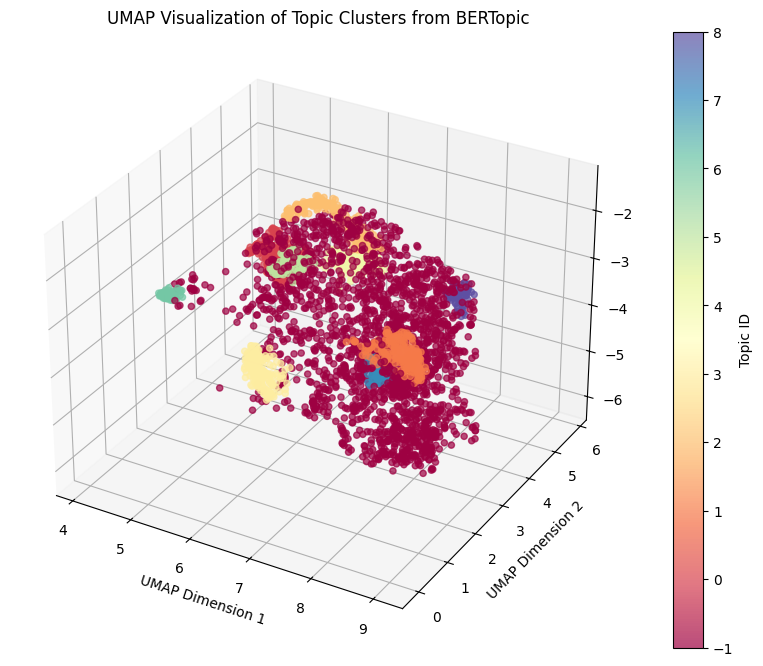

In [117]:
# get umap embeddings
umap_embeddings = topic_model_custom.umap_model.embedding_

# 3 dimensions
umap_df = pd.DataFrame(umap_embeddings, columns=["x", "y", "z"])
umap_df["topic"] = topics
topic_counts = umap_df["topic"].value_counts()

# get the top 10 topics
top_10_topics = topic_counts.nlargest(10).index

# Step 3: Filter the DataFrame for top 10 topics only
filtered_umap_df = umap_df[umap_df["topic"].isin(top_10_topics)]

# Step 4: Visualize UMAP with topic clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    filtered_umap_df["x"],
    filtered_umap_df["y"],
    filtered_umap_df["z"],
    c=filtered_umap_df["topic"],
    cmap="Spectral",
    alpha=0.7,
)

plt.colorbar(scatter, label="Topic ID")
plt.title("UMAP Visualization of Topic Clusters from BERTopic")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

In [118]:
# Step 4: Create an interactive 3D scatter plot
fig = px.scatter_3d(
    filtered_umap_df,
    x="x",
    y="y",
    z="z",
    color="topic",
    title="3D t-SNE Visualization of Topic Clusters from BERTopic",
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [119]:
fig = topic_model_custom.visualize_topics()
fig.show()

In [120]:
fig = topic_model_custom.visualize_hierarchy(top_n_topics=10)
fig.show()

# Top-Level Topics: The highest nodes in the hierarchy represent broad, overarching topics. These are generally more abstract and encompass multiple specific themes.
# Subtopics: Nodes that branch off from the top-level topics indicate more specific subtopics. These are often more detailed and focused on particular aspects of the overarching theme.
# links: Lines connecting nodes represent relationships between topics. Closer nodes indicate a higher level of similarity or co-occurrence within the text data.

In [55]:
fig = topic_model_custom.visualize_heatmap(top_n_topics=10)
fig.show()